In [23]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [24]:
f = np.logspace(3,6,1001)
jw = 1j*2*np.pi*f

In [25]:
Rs = 50
Rl = 50
Rne = 50
Rfe = 50

L1 = 10e-9
L2 = 10e-9
k = 0.25
M = k*np.sqrt(L1*L2)
Cm = 1e-12

Vs = 1

In [26]:
Req_v = Rne*Rfe / (Rne + Rfe)
Req_a = Rs*Rl / (Rs + Rl)

In [27]:
V1c = Rl * Vs / (Rl + Rs)

Vfe_c = Req_v / (Req_v + Req_a + 1./(jw*Cm)) * V1c
Vne_c = Vfe_c

In [28]:
Vne_l = jw*M*Rne*Vs / ((Rs+Rl+jw*L1)*(Rne+Rfe+jw*L2) - jw*jw*M)  # I think there is a minus sign mistake on the jw*jw*M terms.
Vfe_l = -jw*M*Rfe*Vs / ((Rs+Rl+jw*L1)*(Rne+Rfe+jw*L2) - jw*jw*M)

In [29]:
Vne = Vne_c + Vne_l
Vfe = Vfe_c + Vfe_l

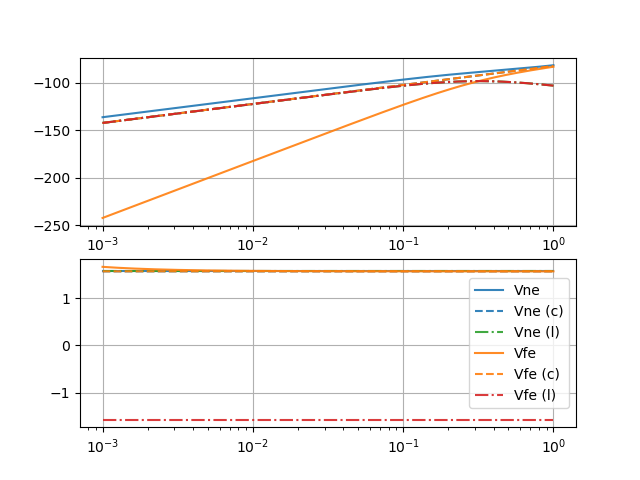

In [30]:
fig, axs = plt.subplots(2,1)

yfcn = lambda y_ : 20*np.log10(np.abs(y_))
yfcna = lambda y_ : np.unwrap(np.angle(y_))
xfcn = lambda x_ : x_/1e6

ax0 = axs[0]
ax0.semilogx(xfcn(f), yfcn(Vne), color='C0', alpha=0.9)
ax0.semilogx(xfcn(f), yfcn(Vne_c), color='C0', linestyle='--')
ax0.semilogx(xfcn(f), yfcn(Vne_l), color='C2', linestyle='-.')
ax0.semilogx(xfcn(f), yfcn(Vfe), color='C1', alpha=0.9)
ax0.semilogx(xfcn(f), yfcn(Vfe_c), color='C1', linestyle='--')
ax0.semilogx(xfcn(f), yfcn(Vfe_l), color='C3', linestyle='-.')
ax0.grid(True)

ax1 = axs[1]
ax1.semilogx(xfcn(f), yfcna(Vne), color='C0', alpha=0.9, label='Vne')
ax1.semilogx(xfcn(f), yfcna(Vne_c), color='C0', alpha=0.9, linestyle='--', label='Vne (c)')
ax1.semilogx(xfcn(f), yfcna(Vne_l), color='C2', alpha=0.9, linestyle='-.', label='Vne (l)')
ax1.semilogx(xfcn(f), yfcna(Vfe), color='C1', alpha=0.9, label='Vfe')
ax1.semilogx(xfcn(f), yfcna(Vfe_c), color='C1', alpha=0.9, linestyle='--', label='Vfe (c)')
ax1.semilogx(xfcn(f), yfcna(Vfe_l), color='C3', alpha=0.9, linestyle='-.', label='Vfe (l)')
ax1.grid(True)
leg1 = ax1.legend(loc='best')


In [31]:
ii = 101
print(f[ii])
print("NE: ", Vne[ii], ", (c) ", Vne_c[ii], ", (l) ", Vne_l[ii])
print("FE: ", Vfe[ii], ", (c) ", Vfe_c[ii], ", (l) ", Vfe_l[ii])

2009.0928126087279
NE:  (4.979458036103372e-13+3.1558127505245214e-07j) , (c)  (9.959550867277322e-14+1.5779378051172795e-07j) , (l)  (3.98350294937564e-13+1.5778749454072418e-07j)
FE:  (-2.987547862647908e-13+6.28597100377129e-12j) , (c)  (9.959550867277322e-14+1.5779378051172795e-07j) , (l)  (-3.98350294937564e-13-1.5778749454072418e-07j)
